# A simple workflow

The following workflow is very simple (and not very realistic). It uses however a series of essential tools and concepts such as importing a file, extracting data, plotting an image etc. offering a basis to explore each of these topics more in depth in dedicated chapters.

## Importing an image

The first task in any workflow is to import the image. We have already seen in a previous chapter that we could use the scikit-image library for this:

In [2]:
import skimage

In [3]:
image = skimage.io.imread('https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/19838_1252_F8_1.tif')


## Handling image data

The output of our import function is ```image``` which is a Numpy ndarray:

In [4]:
type(image)

numpy.ndarray

These arrays have properties such as a shape:

In [5]:
image.shape

(2048, 2048, 3)

Here the image has 2048x2048 pixels and is composed of three channels. We can play with these arrays and for example extract just a single channel:

In [6]:
im_ch1 = image[:, :, 2]

## Plotting

In [7]:
from microfilm.microplot import microshow

Now that we have an image, we of course want to be able to look at it:

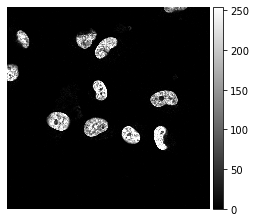

In [8]:
microshow(im_ch1, show_colorbar=True);

## Operating on the image

Numpy arrays are very useful data structures to perform computations very easily. For example, to reduce the range of values we can take the log of the image:

In [9]:
import numpy as np

im_log = np.log(1 + im_ch1.astype(float))

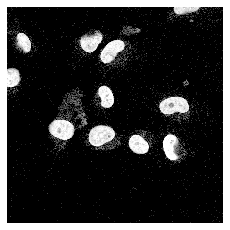

In [10]:
microshow(im_log);

## Selecting pixels

We can now select only pixels above some set threshold. For this we use logical indexing:

In [11]:
im_selected = im_log > 4

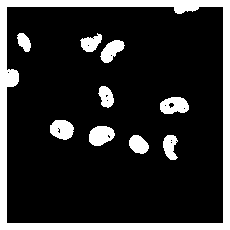

In [12]:
microshow(im_selected);

In [13]:
selected_pixels = im_ch1[im_selected]

## Computing statistics

Now we can compute statistics over those pixels. For example we can compute their mean:

In [14]:
mean_value = np.mean(selected_pixels)
mean_value

177.409565952148

## Control flow

Finally, we can run the same routine on multiple images using a ```for``` loop. And we can also add some logic into our analysis. For example only counting cases where intensity is larger than a threshold.

Our list of files is (we'll see later automated ways of finding those files):

In [15]:
files = ['https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/19838_1252_F8_1.tif',
         'https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/24138_196_F7_2.tif',
         'https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/27897_273_C8_2.tif']


In [16]:
pixel_threshold = 4
mean_threshold = 140

count_positive = 0

for f in files:
    
    image = skimage.io.imread(f)
    
    im_ch1 = image[:, :, 2]
    
    im_log = np.log(1 + im_ch1.astype(float))
    
    im_selected = im_log > pixel_threshold
    
    selected_pixels = im_ch1[im_selected]
    
    mean_value = np.mean(selected_pixels)
    
    if mean_value > mean_threshold:
        count_positive = count_positive + 1
        
    
f'Count is: {count_positive}'

'Count is: 2'